# WeatherPy
----

### Analysis
* After mapping out the correlation between key weather metrics and the equator, this is what I learned:
* There is a direct relation between the temperature of a city and how close it is to the equator.  The closer you get to the equator, the warmer it gets!
* I agree with the statement that there is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no direct relation between the lat/long of a city and the cloudiness or wind speed of a city.
* There is data to suggest that the highest your latitude is, the wider range of humidity you can expect.  There are few cities with a low latitude who experience low humidity.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import pprint
pp = pprint.PrettyPrinter(indent=4)

# Import API key
api_key = "05c730564e4c5039e7904099cf578f6e"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [34]:
# Starting URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

# Create empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
record = 1

# Log file print statement
print(f"Your randomly selected cites are:")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
#         print(f"{url}&q={city}")
        
        # Increase counter by one 
        record= record + 1
        
        # Someone told me to use this, so I did...
        # time.sleep(1.01)
        
    # Skip NaN records
    except:
        print("City not found. Skipping...")
    continue
print(response)

Your randomly selected cites are:
-------------------------------
Processing Record 1 | Geraldton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=05c730564e4c5039e7904099cf578f6e&q=geraldton
Processing Record 2 | Cockburn Town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=05c730564e4c5039e7904099cf578f6e&q=cockburn town
Processing Record 3 | Hobyo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=05c730564e4c5039e7904099cf578f6e&q=hobyo
Processing Record 4 | Arraial do Cabo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=05c730564e4c5039e7904099cf578f6e&q=arraial do cabo
Processing Record 5 | Nizhniy Odes
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=05c730564e4c5039e7904099cf578f6e&q=nizhniy odes
Processing Record 6 | Bathsheba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=05c730564e4c5039e7904099cf578f6e&q=bathsheba
Processing Record 7 | Salalah
http://api.openw

Processing Record 114 | Chochola
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=05c730564e4c5039e7904099cf578f6e&q=chochola
Processing Record 115 | Coihaique
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=05c730564e4c5039e7904099cf578f6e&q=coihaique
Processing Record 116 | Vostok
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=05c730564e4c5039e7904099cf578f6e&q=vostok
City not found. Skipping...
Processing Record 117 | Porkhov
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=05c730564e4c5039e7904099cf578f6e&q=porkhov
Processing Record 118 | Urusha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=05c730564e4c5039e7904099cf578f6e&q=urusha
Processing Record 119 | Kohima
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=05c730564e4c5039e7904099cf578f6e&q=kohima
Processing Record 120 | Port Lincoln
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=05c730564

Processing Record 171 | Tuktoyaktuk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=05c730564e4c5039e7904099cf578f6e&q=tuktoyaktuk
Processing Record 172 | Burla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=05c730564e4c5039e7904099cf578f6e&q=burla
Processing Record 173 | Fort Nelson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=05c730564e4c5039e7904099cf578f6e&q=fort nelson
Processing Record 174 | Hamilton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=05c730564e4c5039e7904099cf578f6e&q=hamilton
Processing Record 175 | Buta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=05c730564e4c5039e7904099cf578f6e&q=buta
Processing Record 176 | Bonthe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=05c730564e4c5039e7904099cf578f6e&q=bonthe
Processing Record 177 | Barra da Estiva
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=05c730564e4c5039e7904099cf57

Processing Record 226 | Saint George
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=05c730564e4c5039e7904099cf578f6e&q=saint george
City not found. Skipping...
City not found. Skipping...
Processing Record 227 | Ostrovnoy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=05c730564e4c5039e7904099cf578f6e&q=ostrovnoy
Processing Record 228 | Santa Maria
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=05c730564e4c5039e7904099cf578f6e&q=santa maria
Processing Record 229 | Port Blair
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=05c730564e4c5039e7904099cf578f6e&q=port blair
Processing Record 230 | Trincomalee
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=05c730564e4c5039e7904099cf578f6e&q=trincomalee
Processing Record 231 | Snasa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=05c730564e4c5039e7904099cf578f6e&q=snasa
Processing Record 232 | Misratah
http://api.openweathe

Processing Record 281 | Hami
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=05c730564e4c5039e7904099cf578f6e&q=hami
Processing Record 282 | Estevan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=05c730564e4c5039e7904099cf578f6e&q=estevan
Processing Record 283 | Ventspils
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=05c730564e4c5039e7904099cf578f6e&q=ventspils
Processing Record 284 | San Rafael
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=05c730564e4c5039e7904099cf578f6e&q=san rafael
Processing Record 285 | Middelburg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=05c730564e4c5039e7904099cf578f6e&q=middelburg
Processing Record 286 | Camacha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=05c730564e4c5039e7904099cf578f6e&q=camacha
Processing Record 287 | Zyryanka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=05c730564e4c5039e7904099cf578f6

Processing Record 337 | Kupang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=05c730564e4c5039e7904099cf578f6e&q=kupang
Processing Record 338 | Xiongzhou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=05c730564e4c5039e7904099cf578f6e&q=xiongzhou
City not found. Skipping...
Processing Record 339 | Poso
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=05c730564e4c5039e7904099cf578f6e&q=poso
Processing Record 340 | Kaitangata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=05c730564e4c5039e7904099cf578f6e&q=kaitangata
Processing Record 341 | Bereda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=05c730564e4c5039e7904099cf578f6e&q=bereda
Processing Record 342 | Narsaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=05c730564e4c5039e7904099cf578f6e&q=narsaq
Processing Record 343 | Terrasini
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=05c730564e4c50

Processing Record 395 | Strezhevoy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=05c730564e4c5039e7904099cf578f6e&q=strezhevoy
Processing Record 396 | Bulungu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=05c730564e4c5039e7904099cf578f6e&q=bulungu
Processing Record 397 | Samaipata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=05c730564e4c5039e7904099cf578f6e&q=samaipata
Processing Record 398 | Shepsi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=05c730564e4c5039e7904099cf578f6e&q=shepsi
Processing Record 399 | Lang Son
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=05c730564e4c5039e7904099cf578f6e&q=lang son
Processing Record 400 | Kawalu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=05c730564e4c5039e7904099cf578f6e&q=kawalu
Processing Record 401 | Bam
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=05c730564e4c5039e7904099cf578f6e&q=bam

Processing Record 451 | Mahajanga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=05c730564e4c5039e7904099cf578f6e&q=mahajanga
Processing Record 452 | Bluefields
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=05c730564e4c5039e7904099cf578f6e&q=bluefields
City not found. Skipping...
City not found. Skipping...
Processing Record 453 | Dukat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=05c730564e4c5039e7904099cf578f6e&q=dukat
Processing Record 454 | Alihe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=05c730564e4c5039e7904099cf578f6e&q=alihe
Processing Record 455 | Rodrigues Alves
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=05c730564e4c5039e7904099cf578f6e&q=rodrigues alves
Processing Record 456 | Kavaratti
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=05c730564e4c5039e7904099cf578f6e&q=kavaratti
Processing Record 457 | Eregli
http://api.openweathermap.org/dat

Processing Record 507 | Punto Fijo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=05c730564e4c5039e7904099cf578f6e&q=punto fijo
Processing Record 508 | Gambela
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=05c730564e4c5039e7904099cf578f6e&q=gambela
Processing Record 509 | Mastic Beach
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=05c730564e4c5039e7904099cf578f6e&q=mastic beach
Processing Record 510 | Contamana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=05c730564e4c5039e7904099cf578f6e&q=contamana
City not found. Skipping...
Processing Record 511 | Colorado
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=05c730564e4c5039e7904099cf578f6e&q=colorado
Processing Record 512 | Fort Frances
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=05c730564e4c5039e7904099cf578f6e&q=fort frances
Processing Record 513 | San Vicente
http://api.openweathermap.org/data/2.5/weather

In [5]:
# Create a dictonary with the lists generated
weather_dictionary = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

In [6]:
pp.pprint(weather_dictionary)

{   'City': [   'Geraldton',
                'Cockburn Town',
                'Hobyo',
                'Arraial do Cabo',
                'Nizhniy Odes',
                'Bathsheba',
                'Salalah',
                'Bilibino',
                'Puerto Ayora',
                'Hilo',
                'Iqaluit',
                'Pachmarhi',
                'East London',
                'Acapulco',
                'Chuy',
                'Garowe',
                'Busselton',
                'Chokurdakh',
                'Chicama',
                'Inuvik',
                'Pisco',
                'Saint-Philippe',
                'Katsuura',
                'Kahului',
                'Bluff',
                'Cassilandia',
                'Cape Town',
                'Lebu',
                'Tanabe',
                'Katobu',
                'Pevek',
                'Kapaa',
                'Kuito',
                'Tongliao',
                'Daru',
                'Butaritari

                1553363760,
                1553366169,
                1553366169,
                1553366170,
                1553366170,
                1553365888,
                1553366170,
                1553366060,
                1553366170,
                1553366170,
                1553364000,
                1553366171,
                1553366171,
                1553366171,
                1553366171,
                1553366171,
                1553366036,
                1553366172,
                1553366095,
                1553363700,
                1553365887,
                1553366100,
                1553364000,
                1553365200,
                1553366173,
                1553364000,
                1553365907,
                1553366174,
                1553366174,
                1553366077,
                1553364000,
                1553366075,
                1553366174,
                1553366175,
                1553365992,
                1553

               -52.55,
               -99.33,
               -15.83,
               9.26,
               -0.29,
               159.59,
               20.97,
               -73.79,
               26.4,
               153.09,
               26.19,
               122.97,
               -9.17,
               98.46,
               120.76,
               10.7,
               6.51,
               88.52,
               115.7,
               74.5,
               28.24,
               40.52,
               136.49,
               169.27,
               124.29,
               -52.33,
               18.06,
               128.87,
               46.72,
               61.49,
               -97.75,
               145.77,
               8.32,
               75.06,
               12.69,
               15.35,
               35.47,
               59.53,
               16.43,
               3.35,
               -120.46,
               -94.27,
               23.3,
               -115.58,
               5.65,

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
#Make a  dataframe from the dictionary
weather_df = pd.DataFrame(weather_dictionary)

#DF info
print(weather_df.count())
print(weather_df.describe())

output_weather_df = "weather_df_output/cities.csv"

City          545
Cloudiness    545
Country       545
Date          545
Humidity      545
Lat           545
Lng           545
Max Temp      545
Wind Speed    545
dtype: int64
       Cloudiness          Date    Humidity         Lat         Lng  \
count  545.000000  5.450000e+02  545.000000  545.000000  545.000000   
mean    38.192661  1.553366e+09   69.387156   21.231853   18.905615   
std     34.812596  9.557455e+02   23.548890   33.016236   87.755873   
min      0.000000  1.553360e+09    0.000000  -54.810000 -173.230000   
25%      1.000000  1.553366e+09   52.000000   -5.670000  -56.830000   
50%     32.000000  1.553366e+09   73.000000   26.590000   18.600000   
75%     75.000000  1.553366e+09   89.000000   48.650000   94.800000   
max    100.000000  1.553366e+09  100.000000   78.220000  179.320000   

         Max Temp  Wind Speed  
count  545.000000  545.000000  
mean    56.706220    8.532128  
std     26.099359    6.357659  
min    -31.380000    1.010000  
25%     40.360000    3.85

In [9]:
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Geraldton,5,CA,1553364000,17,49.72,-86.95,46.40,16.11
1,Cockburn Town,0,TC,1553365812,98,21.46,-71.14,79.60,10.22
2,Hobyo,12,SO,1553366066,86,5.35,48.53,80.14,12.80
3,Arraial do Cabo,40,BR,1553364000,65,-22.97,-42.02,82.40,10.29
4,Nizhniy Odes,8,RU,1553366066,86,63.64,54.86,27.13,6.64


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

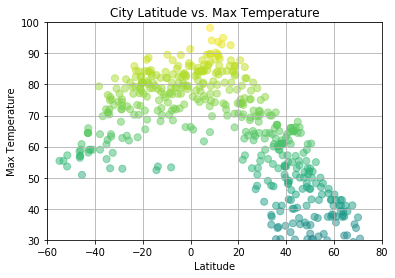

In [58]:
#Plot Lat vs Temp
x_axis = weather_df['Lat']
temp = weather_df['Max Temp']
plt.xlim(-60, 80)
plt.ylim(30, 100)
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.grid()

# rng = np.random.RandomState(0)
# colors = rng.rand(545)
c=weather_df["Max Temp"]
plt.scatter(x_axis, temp, marker="o", c=c, s=50, alpha=0.5)

# Save the figure
plt.savefig("Latitude_vs_Temp.png")

plt.show()

#### Latitude vs. Humidity Plot

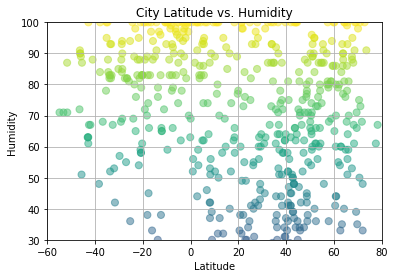

In [57]:
#Plot Lat vs Humidity
x_axis = weather_df['Lat']
humidity = weather_df['Humidity']
plt.xlim(-60, 80)
plt.ylim(30, 100)

plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()
c=weather_df["Humidity"]
plt.scatter(x_axis, humidity, marker="o", c=c, s=50, alpha=0.5)

# Save the figure
plt.savefig("Latitude_vs_Humidity.png")

plt.show()

#### Latitude vs. Cloudiness Plot

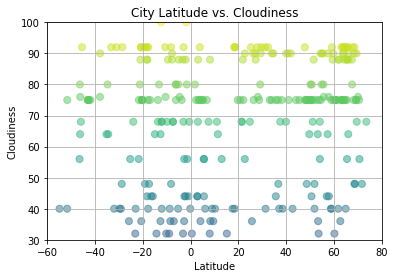

In [60]:
#Plot Lat vs Cloudiness
x_axis = weather_df['Lat']
Cloudiness = weather_df['Cloudiness']
plt.xlim(-60, 80)
plt.ylim(30, 100)

plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()
c=weather_df["Cloudiness"]
plt.scatter(x_axis, Cloudiness, marker="o", c=c, s=50, alpha=0.5)

# Save the figure
plt.savefig("Latitude_vs_Cloudiness.png")

plt.show()

#### Latitude vs. Wind Speed Plot

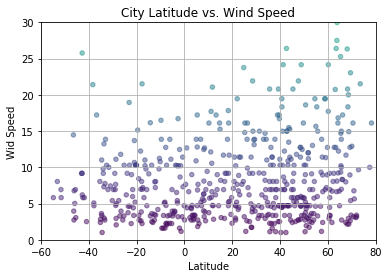

In [59]:
#Plot Lat vs Wind Speed
x_axis = weather_df['Lat']
wind = weather_df['Wind Speed']
plt.xlim(-60, 80)
plt.ylim(0, 30)

plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wid Speed")
plt.grid()
c=weather_df["Wind Speed"]
plt.scatter(x_axis, wind, marker="o", c=c, s=20, alpha=0.5)

# Save the figure
plt.savefig("Latitude_vs_Windspeed.png")

plt.show()